In [1]:
# Week-1 Async
# Exercise: Build a word-cloud from text
# Choice of text: 
# Pink Floyd's The Dark side of the moon (album) review data-set from Kaggle
# Objective: 
# To make a word-cloud of the review and bring out any clear
# verdicts of the album & possibly specific song likes

import pandas as pd

df = pd.read_csv('/Users/venkatasharatsripada/Downloads/dsotm_reviews.csv')
df.head()

,Review,Rating
0,"""More has been said about Dark Side of the Moo...",4.5
1,What can I possibly say about an album that no...,5.0
2,You know for a band that spent several albums ...,2.0
3,Has finally clicked with me in full ...,4.0
4,So why are people afraid to say this...,4.5


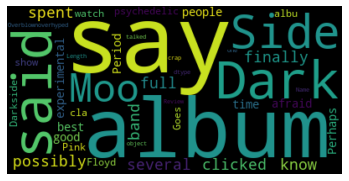

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the Review column and feed it into a var of type str
review = str(df['Review'])
wordcloud = WordCloud().generate(review)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Load a tsv into DF

import pandas as pd
df = pd.read_csv('/Users/venkatasharatsripada/Downloads/moviereview.tsv', sep='\t')

# Needed to shuffle the data-frame due to overfitting
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,text,reviewclass
0,'studio expectations must not have been high f...,pos
1,"'among multitude of erotic thrillers , that ha...",neg
2,'note to screenwriters and self : when you hit...,neg
3,"'for a good ten years or so , super cool chow ...",neg
4,'synopsis : sonny koufax ( adam sandler ) is a...,neg


In [27]:
# Split the data into train and test
cols = df.shape[0]
train_len = int(0.8 * cols)

df_train = df.head(train_len)
df_test = df.iloc[train_len:]

df_test.head()

,text,reviewclass
1600,"'you know something , christmas is not about p...",neg
1601,'a month ago i wrote that speed 2 was the wors...,neg
1602,'why do so many children\'s films treat their ...,pos
1603,'birthdays often cause individuals to access t...,neg
1604,'back in february at the monthly los angeles c...,neg


In [28]:
# We will use the make_pipeline function. This 
# will internally transform the text data and 
# then the model will be fitted using the transformed data.
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(df_train.text, df_train.reviewclass)

# Predict the categories of the test data
predicted_categories = model.predict(df_test.text)

In [30]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(df_test.reviewclass, predicted_categories)

print(test_accuracy)

0.8625


In [36]:
# Print the training accuracy as well
y_predict_for_trainData = model.predict(df_train.text)
train_accuracy = accuracy_score(df_train.reviewclass, y_predict_for_trainData)

print(train_accuracy)

0.971875


In [2]:
import pandas as pd

df_movies = pd.read_csv('/Users/venkatasharatsripada/Downloads/moviereview.tsv', sep='\t')
df_movies.head()

,text,reviewclass
0,'plot : two teen couples go to a church party ...,neg
1,'the happy bastard\'s quick movie review \ndam...,neg
2,'it is movies like these that make a jaded mov...,neg
3,"' \"" quest for camelot \"" is warner bros . \' ...",neg
4,'synopsis : a mentally unstable man undergoing...,neg


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

corpus = []
for row in df_movies.text:
    corpus.append(re.sub(r'\\n|\\', '', row))
    # print(corpus)
    
# print(corpus[:5])

# Binary Term Frequency
tv = TfidfVectorizer(binary=True, norm=False, use_idf=False, smooth_idf=False, 
                     lowercase=True, stop_words='english', min_df=1, max_df=1.0, max_features=None,
                     ngram_range=(1,1))

df = pd.DataFrame(tv.fit_transform(corpus).toarray(), columns=tv.get_feature_names())

for review, value in zip(corpus, list(df.bad)):
    if int(value) == 1:
        print(review, value)
        break

'plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what's the deal ? watch the movie and " sorta " find out . . . critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it's simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea what's

In [17]:
# BoW Frequency
tv = TfidfVectorizer(binary=False, norm=False, use_idf=False, smooth_idf=False, 
                     lowercase=True, stop_words='english', min_df=1, max_df=1.0, max_features=None,
                     ngram_range=(1,1))

df = pd.DataFrame(tv.fit_transform(corpus).toarray(), columns=tv.get_feature_names())

for review, value in zip(corpus, list(df.bad)):
    if int(value) > 0:
        print(review, value)
        break

'plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what's the deal ? watch the movie and " sorta " find out . . . critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it's simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea what's

In [22]:
# L1 normalized Frequency
tv = TfidfVectorizer(binary=True, norm='l1', use_idf=False, smooth_idf=False, 
                     lowercase=True, stop_words='english', min_df=1, max_df=1.0, max_features=None,
                     ngram_range=(1,1))

df = pd.DataFrame(tv.fit_transform(corpus).toarray(), columns=tv.get_feature_names())

for review, value in zip(corpus, list(df.bad)):
    if float(value) != 0.0:
        print(review, value)
        break

'plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what's the deal ? watch the movie and " sorta " find out . . . critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it's simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea what's

In [24]:
# Binary Term Frequency
tv = TfidfVectorizer(binary=True, norm='l2', use_idf=True, smooth_idf=False, 
                     lowercase=True, stop_words='english', min_df=1, max_df=1.0, max_features=None,
                     ngram_range=(1,1))

df = pd.DataFrame(tv.fit_transform(corpus).toarray(), columns=tv.get_feature_names())

for review, value in zip(corpus, list(df.bad)):
    if float(value) != 0.0:
        print(review, value)
        break

'plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what's the deal ? watch the movie and " sorta " find out . . . critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . they seem to have taken this pretty neat concept , but executed it terribly . so what are the problems with the movie ? well , its main problem is that it's simply too jumbled . it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no idea what's

In [31]:
import nltk
from nltk.corpus import stopwords

count = 0
for sentence in corpus:
    for word in sentence:
        count += 1

print('Total words in corpus %d' % count)

# Repeat the above by removing stop-words
count = 0
stop_words = stopwords.words('english')
for sentence in corpus:
    for word in sentence:
        if word.lower() not in stop_words:
            count += 1
        
print('Total words in corpus after filtering for stop-words %d' % count)



Total words in corpus 7725273
Total words in corpus after filtering for stop-words 4913345
